In [1]:
import numpy as np
import math
from numpy import linalg as LA

sigma = 10
beta = 8 / 3
rho = 28

x = 0
y = 0
z = 0
Df_Dx1 = np.array([[-sigma, sigma, 0],[rho-z, -1, -x ],[y, x , -beta]])
print(LA.eig(Df_Dx1))

x = math.sqrt(72)
y = math.sqrt(72)
z = 27
Df_Dx2 = np.array([[-sigma, sigma, 0],[rho-z, -1, -x ],[y, x , -beta]])
print(LA.eig(Df_Dx2))

x = -math.sqrt(72)
y = -math.sqrt(72)
z = 27
Df_Dx3 = np.array([[-sigma, sigma, 0],[rho-z, -1, -x ],[y, x , -beta]])
print(LA.eig(Df_Dx3))

(array([-22.82772345,  11.82772345,  -2.66666667]), array([[-0.61481679, -0.41650418,  0.        ],
       [ 0.78866997, -0.9091338 ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]]))
(array([-13.85457791 +0.j        ,   0.09395562+10.19450522j,
         0.09395562-10.19450522j]), array([[ 0.85566502+0.j        , -0.26611932-0.29501017j,
        -0.26611932+0.29501017j],
       [-0.32982275+0.j        ,  0.03212861-0.56907743j,
         0.03212861+0.56907743j],
       [-0.39881615+0.j        , -0.71921356+0.j        ,
        -0.71921356-0.j        ]]))
(array([-13.85457791 +0.j        ,   0.09395562+10.19450522j,
         0.09395562-10.19450522j]), array([[ 0.85566502+0.j        , -0.26611932-0.29501017j,
        -0.26611932+0.29501017j],
       [-0.32982275+0.j        ,  0.03212861-0.56907743j,
         0.03212861+0.56907743j],
       [ 0.39881615+0.j        ,  0.71921356+0.j        ,
         0.71921356-0.j        ]]))


In [2]:
sigma = 10
beta = 8 / 3
Df_Dx_list = []
rho_m = np.arange(5, 55, 5)
fix_pts = [[0, 0, 0], [math.sqrt(72), math.sqrt(72), 27], [-math.sqrt(72), -math.sqrt(72), 27]]

for fix_pt in fix_pts:
    for i, rho in enumerate(rho_m):
        print("fix pt ",fix_pt, "rho ", rho)
        Df_Dx = [[-sigma, sigma, 0],[rho-fix_pt[2], -1, -fix_pt[0] ],[fix_pt[1], fix_pt[0], -beta]]
        u, v = LA.eig(Df_Dx)
        print("eigenvalue ", u, "\n")

fix pt  [0, 0, 0] rho  5
eigenvalue  [-13.88152731   2.88152731  -2.66666667] 

fix pt  [0, 0, 0] rho  10
eigenvalue  [-16.4658561    5.4658561   -2.66666667] 

fix pt  [0, 0, 0] rho  15
eigenvalue  [-18.54798835   7.54798835  -2.66666667] 

fix pt  [0, 0, 0] rho  20
eigenvalue  [-20.34082208   9.34082208  -2.66666667] 

fix pt  [0, 0, 0] rho  25
eigenvalue  [-21.93928222  10.93928222  -2.66666667] 

fix pt  [0, 0, 0] rho  30
eigenvalue  [-23.39553017  12.39553017  -2.66666667] 

fix pt  [0, 0, 0] rho  35
eigenvalue  [-24.7418814   13.7418814   -2.66666667] 

fix pt  [0, 0, 0] rho  40
eigenvalue  [-26.          15.          -2.66666667] 

fix pt  [0, 0, 0] rho  45
eigenvalue  [-27.18524844  16.18524844  -2.66666667] 

fix pt  [0, 0, 0] rho  50
eigenvalue  [-28.30898946  17.30898946  -2.66666667] 

fix pt  [8.48528137423857, 8.48528137423857, 27] rho  5
eigenvalue  [-3.22822306+16.56380116j -3.22822306-16.56380116j
 -7.21022055 +0.j        ] 

fix pt  [8.48528137423857, 8.48528137423857

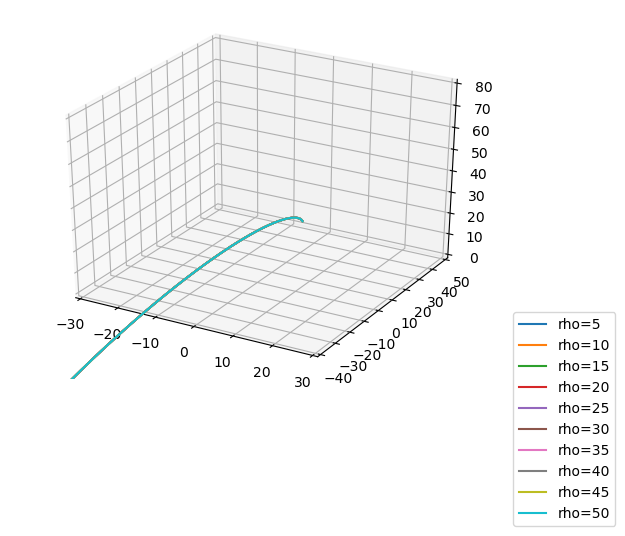

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D 

# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho_m = np.arange(5, 55, 5)

# Initial condition
y0 = [10, 10, 10]

# fixed points
fix_pts = [[0, 0, 0], 
           [math.sqrt(72), math.sqrt(72), 27], 
           [-math.sqrt(72), -math.sqrt(72), 27]]

# Compute trajectory 
dt = 0.01
T = 20
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)
ax = plt.figure().add_subplot(projection='3d')  # make a 3D plot
l = []

# linearized_function
fix_pt = fix_pts[1]
Df_Dx = np.array([[-sigma, sigma, 0],
                  [rho-fix_pt[2], -1, -fix_pt[0]],
                  [fix_pt[1], fix_pt[0], -beta]])
def linearized_function(t, y):
    return Df_Dx @ y # A @ y

for i, rho in enumerate(rho_m):
    linearized_solution = solve_ivp(linearized_function, (0, T), fix_pt, t_eval=t)
    t = linearized_solution.t
    y = linearized_solution.y.T
    ax.plot(y[:, 0], y[:, 1], y[:, 2])
    l.append("rho={}".format(rho))
ax.axes.set_xlim3d(left=-30, right=30) 
ax.axes.set_ylim3d(bottom=-40, top=50) 
ax.axes.set_zlim3d(bottom=0, top=80) 
plt.legend(l, bbox_to_anchor=(1.0, 0.2), loc="upper left")
plt.show()

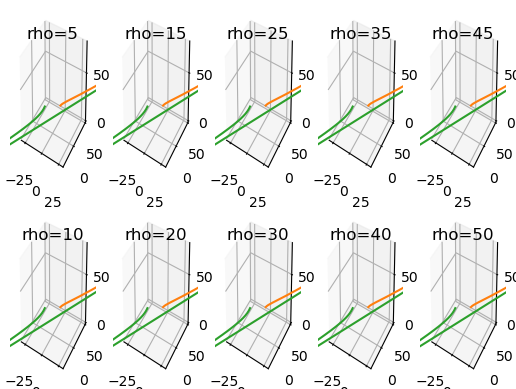

In [8]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D 


# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho_m = np.arange(5, 55, 5)

# Initial condition
y0 = [10, 10, 10]

# fixed points
fix_pts = [[0, 0, 0], 
           [math.sqrt(72), math.sqrt(72), 27], 
           [-math.sqrt(72), -math.sqrt(72), 27]]

# Compute trajectory 
dt = 0.01
T = 20
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)

# linearized_function
fix_pt = fix_pts[0]
Df_Dx = np.array([[-sigma, sigma, 0],
                  [rho-fix_pt[2], -1, -fix_pt[0]],
                  [fix_pt[1], fix_pt[0], -beta]])
def linearized_function(t, y):
    return Df_Dx @ y # A @ y

fig, axs = plt.subplots(2, 5, subplot_kw={'projection': '3d'})  # make a 3D plot
for i, rho in enumerate(rho_m):
    for fix_pt in fix_pts:
        lorenz_solution = solve_ivp(linearized_function, (0, T), fix_pt, t_eval=t)
        t = lorenz_solution.t
        y = lorenz_solution.y.T
        row = (i) % 2
        col = (i) // 2
        axs[row, col].plot(y[:, 0], y[:, 1], y[:, 2])
        axs[row, col].set_title("rho={}".format(rho))
        axs[row, col].set_xlim3d(left=-30, right=30) 
        axs[row, col].set_ylim3d(bottom=-40, top=50) 
        axs[row, col].set_zlim3d(bottom=0, top=80) 
plt.show()

In [20]:
"""
This part of code is partially referenced from L18_simulateLORENZ.ipynb
Modeified by Henry Chang
"""
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D 


def lorenz(t, y):
    # y is a three dimensional state-vector
    dy = [sigma * (y[1] - y[0]), 
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
    return np.array(dy)

# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho_m = np.arange(5, 55, 5)

# Initial condition
y0 = [10, 10, 10]

# Compute trajectory 
dt = 0.01
T = 20
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)
# ax = plt.figure().add_subplot(projection='3d')  # make a 3D plot
l = []
for i, rho in enumerate(rho_m):
    lorenz_solution = solve_ivp(lorenz, (0, T), y0, t_eval=t)
    t = lorenz_solution.t
    y = lorenz_solution.y.T
    if rho == 50:
        y_rho50 = y.copy()
    # plt.plot(y[:, 0], y[:, 1], y[:, 2])
    l.append("rho={}".format(rho))
# plt.legend(l, bbox_to_anchor=(1.0, 0.2), loc="upper left")
# plt.show()


print(len(y_rho50))
for item in y_rho50:
        print(item)

2000
[10. 10. 10.]
[10.18675892 13.86513441 10.92385636]
[10.72335773 17.71764396 12.26546743]
[11.57835179 21.62096001 14.10743754]
[12.72404692 25.59442598 16.56259499]
[14.14139581 29.59552447 19.78846831]
[15.80516225 33.49787441 23.94624742]
[17.66889023 37.0732624  29.15752394]
[19.66483573 39.99326853 35.50332141]
[21.70023913 41.84800557 42.95383416]
[23.64066043 42.07769809 51.23842663]
[25.32600459 40.264378   59.86934748]
[26.57543243 36.2112169  68.14550113]
[27.2120601  29.91834751 75.17487918]
[27.11227577 22.09289832 80.2164149 ]
[26.22655694 13.6794769  82.89518222]
[24.60841315  5.37783549 83.16626126]
[22.39588848 -2.24673517 81.33755606]
[19.73577645 -8.49116603 78.06609237]
[ 16.81089823 -13.15546896  74.0116495 ]
[ 13.7913755  -16.35693785  69.79713092]
[ 10.81505759 -18.38156906  65.84778679]
[  7.97409626 -19.51604628  62.35518341]
[  5.32781271 -20.03503908  59.41964859]
[  2.90475188 -20.17536873  57.04490068]
[  0.7107101  -20.08750429  55.19070032]
[ -1.26097

[8.48528137423857, 8.48528137423857, 27]


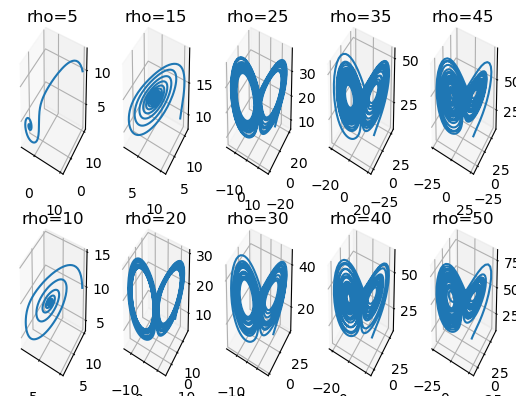

In [12]:
"""
This part of code is partially referenced from L18_simulateLORENZ.ipynb
Modeified by Henry Chang
"""
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D 

def lorenz(t, y):
    # y is a three dimensional state-vector
    dy = [sigma * (y[1] - y[0]), 
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
    return np.array(dy)

# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho_m = np.arange(5, 55, 5)

# fixed points
fix_pts = [[0, 0, 0], 
           [math.sqrt(72), math.sqrt(72), 27], 
           [-math.sqrt(72), -math.sqrt(72), 27]]

# Initial condition
y0 = [10, 10, 10]

# Compute trajectory 
dt = 0.01
T = 20
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)
fig, axs = plt.subplots(2, 5, subplot_kw={'projection': '3d'})  # make a 3D plot
for i, rho in enumerate(rho_m):
    lorenz_solution = solve_ivp(lorenz, (0, T), y0, t_eval=t)
    t = lorenz_solution.t
    y = lorenz_solution.y.T
    row = (i) % 2
    col = (i) // 2
    axs[row, col].plot(y[:, 0], y[:, 1], y[:, 2])
    axs[row, col].set_title("rho={}".format(rho))
plt.show()

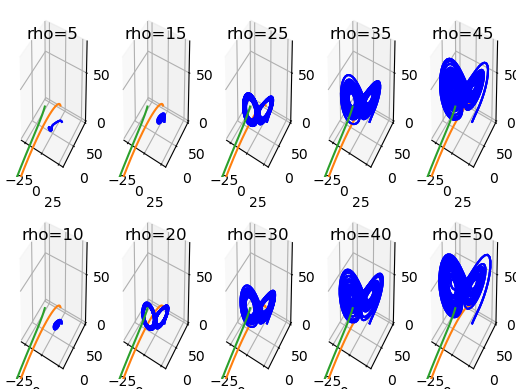

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D 

def lorenz(t, y):
    # y is a three dimensional state-vector
    dy = [sigma * (y[1] - y[0]), 
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
    return np.array(dy)

# fixed points
fix_pts = [[0, 0, 0], 
           [math.sqrt(72), math.sqrt(72), 27], 
           [-math.sqrt(72), -math.sqrt(72), 27]]

# linearized_function
fix_pt = fix_pts[1]
Df_Dx = np.array([[-sigma, sigma, 0],
                  [rho-fix_pt[2], -1, -fix_pt[0]],
                  [fix_pt[1], fix_pt[0], -beta]])
def linearized_function(t, y):
    return Df_Dx @ y # A @ y
    
# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho_m = np.arange(5, 55, 5)

# Initial condition
y0 = [10, 10, 10]

# Compute trajectory 
dt = 0.01
T = 20
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)
fig, axs = plt.subplots(2, 5, subplot_kw={'projection': '3d'})  # make a 3D plot
for i, rho in enumerate(rho_m):
    for fix_pt in fix_pts:
        lorenz_solution = solve_ivp(lorenz, (0, T), y0, t_eval=t)
        linearized_solution = solve_ivp(linearized_function, (0, T), fix_pt, t_eval=t)
        t = lorenz_solution.t
        y = lorenz_solution.y.T
        yl = linearized_solution.y.T
        row = (i) % 2
        col = (i) // 2
        axs[row, col].plot(y[:, 0], y[:, 1], y[:, 2], 'blue')
        axs[row, col].plot(yl[:, 0], yl[:, 1], yl[:, 2])
        axs[row, col].set_title("rho={}".format(rho))
        axs[row, col].set_xlim3d(left=-30, right=30) 
        axs[row, col].set_ylim3d(bottom=-40, top=50) 
        axs[row, col].set_zlim3d(bottom=0, top=80) 
plt.show()

0.1
[[ 0.   1. ]
 [-1.   0.1]]
1
[[ 0  1]
 [-1  1]]
20
[[ 0  1]
 [-1 20]]
[[ 1.00000000e-001 -1.00000000e+000]
 [-2.22577534e-001 -7.45048200e+000]
 [-2.61391218e+000 -5.51724845e+001]
 [-2.03230576e+001 -4.08482964e+002]
 [-1.51278525e+002 -3.02104342e+003]
 [-1.12130757e+003 -2.23730164e+004]
 [-8.29182451e+003 -1.65423944e+005]
 [-6.13994792e+004 -1.22491500e+006]
 [-4.54251948e+005 -9.06227241e+006]
 [-3.36128055e+006 -6.70571278e+007]
 [-2.48862714e+007 -4.96477990e+008]
 [-1.84009880e+008 -3.67097400e+009]
 [-1.36273014e+009 -2.71862952e+010]
 [-1.00780000e+010 -2.01054833e+011]
 [-7.46093727e+010 -1.48844761e+012]
 [-5.52149326e+011 -1.10153097e+013]
 [-4.08406652e+012 -8.14766139e+013]
 [-3.02444288e+013 -6.03372554e+014]
 [-2.23616464e+014 -4.46112037e+015]
 [-1.65586392e+015 -3.30342772e+016]
 [-1.22496055e+016 -2.44378090e+017]
 [-9.06534634e+016 -1.80852521e+018]
 [-6.71116480e+017 -1.33886895e+019]
 [-4.96254691e+018 -9.90021875e+019]
 [-3.67519749e+019 -7.33197281e+020]
 

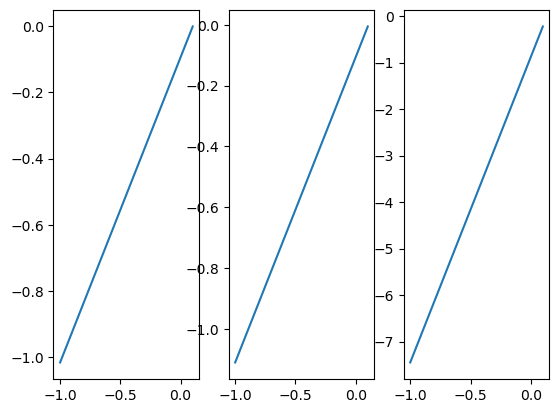

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
epislons = [0.1, 1, 20]
epislon = epislons[0]

# Initial condition
y0 = [0.1, -1]

# Fixed point
fix_pt = [0, 0]

# Compute trajectory 
dt = 0.1
T = 30
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)

Df_Dx = np.array([[0,1],[-1,epislon]])

def linearized_function(t, y):
    return Df_Dx @ y

fig, axs = plt.subplots(1, 3)

for col, epislon in enumerate(epislons):
    print(epislon)
    Df_Dx = np.array([[0,1],[-1,epislon]])
    print(Df_Dx)
    linearized_solution = solve_ivp(linearized_function, (0, T), y0, t_eval=t)
    y = linearized_solution.y.T
    axs[col].plot(y[0], y[1])

print(y)
